# What I need from you...

Congratulations! You probably just opened the most interesting Jupyter Notebook ever.

This Notebook is the result of many hours of hard work. 
And, I need something in return. From you. 

<video src="figures/Minions.mp4" width="280" height="157.5" type="video/mp4" controls>
Your browser does not support the video tag
</video> 

[[14]](#d) 
 
I created this Notebook as part of my bachelor thesis project. An evaluation of this Notebook is part of the thesis. This is why I need you to fill out a questionnaire. 

**You can win something!!!**
If you read the full notebook you don't only get a great understanding of performance in parallel programming, but you can also win something. Just fill out the questionnaire after reading the notebook, and you can win one of the following 6 prizes:
  >1. Jetson Nano Developper Kid <br>
  >2. Amazone Voucher of 15 Euros <br>
  >3. Amazon Voucher of 10 Euros <br>
  >4.-6. Lilipad Mini Microcontroller (including sensors and actuators) <br>

**Duration to fill out questionnaire:** A minimal evaluation takes only a few mouse clicks. In addition, if you wish to give a more detailed feedback, you can also answer the open questions. Any feedback will be very much appreciated. Answers can be in English or in German. 

Please submit the form before the **15th of June 2021**. You can find the questionnaire through this link: https://docs.google.com/forms/d/e/1FAIpQLSeOpNqV1UwPJXYqmG5rfWACDBQtFQvoR_Xm87btLuLylaMMsg/viewform

<img src="figures/phone1.jpg" width="500"  alt="If 115 Students read this Notebook, I would need each one of them to fill out my questionnaire at least 7.429 times in order to get significant results...">

Thank you soooo much for your help! I hope the material presented here will help you.

In [ ]:
%run ~/performance/.topsecret/test1.ipynb


I promise, I will fill out the questionaire before the due date ! 

confirm with yes or no: 


## Introduction

Why are you looking at this notebook right now? I assume it is because you are learning about parallel programming and want to know all about it. But why is that so? Why are you bothering about learning the skill of parallel programming?

<img src="figures/grandpa.jpg" width="400"  alt="I always wanted to be able to say 'I once too took a course in parallel programming'...">

Well, probably you are aware of the importance of creating code with good performance, and you hope that parallel programming will help you with this. According to [[1]](#a) the main reason why we do parallel programming is to increase performance.

But what is performance ? And to what extend can parallel programming help us increase performance ?

When learning about parallel programming it is crucial to understand what performance is, how we can measure it, and how much improvement in performance we can expect when applying parallel programming.

In this Notebook you will learn about:

- [Why we Need Parallel Programming](#why)
- [Speed-up](#speedup)
- [Efficiency](#efficiency)
- [Calculating $t_{serial}$](#calculating)
- [Overhead](#overhead)
- [Amdahl's Law](#amdahl)
- [The serial fraction of a program](#serialfraction)
- [Scalability](#scalability)
- [Gustafson's Law](#gustafson)
- [Summary](#summary)
- [References](#references)

This notebook is not a more complicated version of a textbook, but a tool for interactive learning instead.

You will not only learn about different laws of performance but will also be able to test the validity of these laws yourself. There are a number of benchmarks for this purpose, that you can find in the `./programs` folder. Of course you can also write your own serial and parallel programs and test their performance with the code that I have provided in the `./extras` folder. More details about how to do this you can find in the `./readme.txt` file.

Have fun!!!

## Why we need Parallel Programming <a class="anchor" id="why"></a>

According to [[1]](#a) the main reason why we do parallel programming is to increase performance. Intuitively we think that this means faster programs. While this is definitely one potential benefit of parallel performance, it is not the only one. In addition to speed improvement we can also exploit parallelism to reduce power consumption [[2]](#b).

In this notebook we will not analyze the improvement of performance with regards to power consumption. Nevertheless, I recommend watching the following video by Tim Mattson [[3]](#c). He will talk about why we need parallel programming, and how parallel programming is influencing not only speed but also power consumption. This is the link: https://youtu.be/cMWGeJyrc9w.

What did we learn from Tim Mattson in this video?

We learned that with parallel computing we can either:
1. Execute a program in the same amount of time, but with reduced power consumption 
2. Or execute a program with the same amount of power consumption, but with reduced execution time

In the following sections we will only evaluate performance with regards to execution time. Keep in mind, however, that whenever you are able to reduce execution time, it means that there is also potential to reduce power consumption instead [[4]](#n).

## Speed-Up <a class="anchor" id="speedup"></a>

The term 'speed-up' is used to describe how much faster a new version of a program runs compared to the old version. This implies that we have 2 different execution times that we compare. In the case of parallel programming, it makes sense to compare 
- the execution time 'without parallelism' 
- the execution time 'with parallelism'

Thus the speed-up gives us a measurement for the improvement in speed that was achieved by applying parallelism to a program. 

We use the following formula to calculate speed-up [[5]](#e):

**Speed-up = $\frac{t_{serial}}{t_{parallel}}$**

> $t_{serial}$ = execution time of the serial program, i.e. the program that does not use parallelism
> <br>$t_{parallel}$ = execution time of the parallelized program 

**Question:**
> Assume we have a serial program, that has an execution time of 54 seconds. Now we apply parallelism to our program. When we measure the execution time again, it is 27 seconds. 

> What speed-up did we achieve ? 

In [ ]:
%run ~/performance/.topsecret/test2.ipynb

My answer:


<br><br>
<img src='figures/race3.jpg' width='600' art='picture to illustrate speed-up'>

Another commonly used measurement for performance is 'efficiency'. 

## Efficiency <a class="anchor" id="efficiency"></a>

Imagine you would try to fill up a truck with sand, and you share this task with 2 other friends. Probably you would more or less be able to do the task 3 times faster compared to doing it alone. So speed-up is 3. But what if you try to share the work with 300 of your friends? Would you be 300 times as fast? Probably not, because it would get rather chaotic and your friends would just be in the way of each other. Thus, your friends won't be able to work as efficiently as they would if there were less. 

Efficiency gives us a measurement for how much each parallel processing unit (friend in our example) is contributing to the speed-up. In most cases the efficiency reduces as the number of parallel processing units increases. This intuitively makes sense, if we think about the 'filling a truck with sand' example I just gave. 

This is the formula for efficiency [[1]](#a):

>Efficiency $ = \frac{speed-up}{p} = \frac{\frac{t_{serial}}{t_{parallel}}}{p} = \frac{t_{serial}}{p \cdot t_{parallel}}$


**Question:** Filling a truck with sand all by yourself, you need 6 hours. If you have 23 friends helping you, it takes only 30 minutes. With what efficiency can you load the truck with sand, if you have a team of 24 people (including you) ? 

In [ ]:
%run ~/performance/.topsecret/test15.ipynb

As you can see, calculating the speed-up and the efficiency is very easy.

**Challenge:** Make step by step list of how you would find out speed-up and efficiency for one of the parallel programs you wrote.

My list looks like this:
1. Measure the execution time of the serial program to get $t_{serial}$.
2. Measure the execution time of the parallelized program to get $t_{parallel}$.
3. Calculate speed-up and efficiency with the formulas that we just discussed.

It sound super easy. There are however, a few questions that might come up: 

   > 1. Should you measure CPU time or wall time ? <br>
   > 2. Is it enough to measure the execution time just one time?<br>
   > 3. How to measure the execution time from within Jupyter Notebook?<br>
   > 4. Should you measure the execution time of the full program run, or just a part of it?<br>

In the folder 'extra' you find a notebook called ['Measuring_Execution_Time'](./extras/Measuring_Execution_Time.ipynb). In that notebook we will answer these 4 questions one by one.

## Calculating $t_{serial}$  <a class="anchor" id="calculating"></a>

Let's say we have some algorithm, for example the bubblesort algorithm for sorting a list of integers, and we wish to make it faster. What an excellent opportunity to apply what we have learned about parallel programming. After parallelizing the bubblesort algorithm, we wish to examine the speed-up that we achieved. 

As a quick reminder, speed-up is calculated like this:

Speed-up = $\frac{t_{serial}}{t_{parallel}}$

- To calculate $t_{parallel}$ we simply measure the time spent in the parallelized mergesort function

- What about $t_{serial}$? You might think this is a question with an obvious answer: of course you would just take the serial version of your bubblesort program, and measure the execution time. 

Let's have a look at the speed-up that we can achieve by calculating it this way. We are going to sort a list of 2'500 random numbers; and we set repeats to 100 and the thread number to 8 in the parallel program.

In [27]:
import numpy as np
%cd ~/performance/programs/bubblesort
! ./timing.o 8 100 2500 >/dev/null
time_parallel_bubblesort = np.genfromtxt('/tmp/time.txt')
! ./timing.o 1 100 2500 >/dev/null
time_serial_bubblesort = np.genfromtxt('/tmp/time.txt')
print("\nSpeed-up of Bubblesort with 8 Threads:")
print(time_serial_bubblesort/time_parallel_bubblesort)

/home/jovyan/performance/programs/bubblesort

Speed up of Bubblesort with 8 Threads:
2.4730299667036624


As we can't wait all day, we ran the code only 100 times. This means that the speed-up we end up calculating can vary quite a bit, if we run the code cell above multiple times. 

The speed-up I got when I ran the cell was 2.5.

So that's it, pretty easy and straight forward, right? Well...

<img src="figures/complicated.jpg" width="500"  alt="It looks easy, but you could make it much more complicated...">

One could argue, that $t_{serial}$ should be measured with the best possible algorithm for a specific problem. There are many sorting algorithms, and the fastest one for our specific list of numbers might not necessarily be bubblesort. Quicksort and mergesort  are other sorting algorithms, which could be more efficient for our specific problem. Let's compare the performance of these other sorting algorithms when sorting a list of 2'500 numbers with a serial program:

In [28]:
import numpy as np
%cd ~/performance/programs/bubblesort
! ./timing.o 1 100 2500 >/dev/null
time_serial_bubblesort = np.genfromtxt('/tmp/time.txt')

%cd ~/performance/programs/quicksort
! ./timing.o 1 100 2500 >/dev/null
time_serial_quicksort = np.genfromtxt('/tmp/time.txt')

%cd ~/performance/programs/mergesort
! ./timing.o 1 100 2500 >/dev/null
time_serial_mergesort = np.genfromtxt('/tmp/time.txt')

print('\nserial bubblesort: '+ str(time_serial_bubblesort))
print('serial quicksort: '+ str(time_serial_quicksort))
print('serial mergesort: '+ str(time_serial_mergesort))

/home/jovyan/performance/programs/bubblesort
/home/jovyan/performance/programs/quicksort
/home/jovyan/performance/programs/mergesort

serial bubblesort: 0.011177
serial quicksort: 0.00012
serial mergesort: 0.00014


When sorting a list of 2'500 random numbers, we achieved much better performance with our serial quicksort and mergesort algorithm, than with the serial bubblesort algorithm. Would it not make more sense, to compare the parallel bubblesort program  with the most efficient serial sorting algorithm?

One might think this way, if the focus is on the problem of sorting 2'500 numbers. Were we to solve this problem on a serial machine, we would probably choose quicksort. So the improvement we get by parallelizing bubblesort should be compared to the algorithm we would actually end up using on a serial machine. 

According to [[1]](#a) there are two different practices when measuring $t_{serial}$:
1. take the best available serial algorithm (quicksort in our case)
2. take the serial implementation of the algorithm you parallelized (bubblesort in our case)

Let's have a look at the different speed-up's achieved:

In [29]:
print("Speed-up with Option 1:")
print(time_serial_quicksort/time_parallel_bubblesort)
print("\nSpeed-up with Option 2:")
print(time_serial_bubblesort/time_parallel_bubblesort)

Speed-up with Option 1:
0.026637069922308545

Speed-up with Option 2:
2.4810210876803547


Depending on which option we choose, we get a different speed-up. In our example we get a speed-up smaller than 1 if we use option 1 for calculations. This means that we are much slower with the parallel program compared to the serial one. When we just compare the bubblesort algorithm with itself (with and without parallelization) we get a speed-up of approximately 2.5.

The option used most commonly is the second one [[1]](#a), which is also what we will be doing throughout the rest of this notebook. It is up to you to decide which option is best for your situation. You must ensure however, that other people know what serial algorithm you choose in your calculations of speed-up.

If you looked at my code very alertly, you might have noticed that I calculated the serial execution time by setting the number of threads to 1. I have in fact used the exact same executable than I used for measuring parallel execution time. Is this ok? Or would it be more accurate to write a separate program for the measurement of serial execution time? In the folder `./extras` you can find a notebook ['measuring_serial_time'](./extras/measuring_serial_time.ipynb#serialtime), which analyses exactly that. Feel free to have a look, if you are interested. The conclusion basically is that it is ok to just set thread number to 1, if you don't write a scientific paper and just want to explore things.

In that extra Notebook you will also come across the term 'overhead'. I think it is time to define what we mean with overhead.

## Overhead <a class="anchor" id="overhead"></a>

In the previous section we compared the execution time of parallel bubblesort to serial quicksort. We saw that when we focus on the problem of sorting a list of 2'500 elements, it makes no sense to use bubblesort because quicksort is so much faster. 

Do you wonder if you could speed-up things even more by parallelizing quicksort? If serial quicksort was so much faster than parallel bubblesort, the parallel quicksort must be super super fast. Let's find out...

In [26]:
import numpy as np
%cd ~/performance/programs/quicksort
! ./timing.o 64 100 2500 >/dev/null
time_parallel_quicksort = np.genfromtxt('/tmp/time.txt')
! ./timing.o 1 100 2500 >/dev/null
time_serial_quicksort = np.genfromtxt('/tmp/time.txt')
print("\nSpeed-up of Quicksort with 64 Threads:")
print(time_serial_quicksort/time_parallel_quicksort)

/home/jovyan/performance/programs/quicksort

Speed up of Quicksort with 64 Threads:
0.6470588235294118


We can see that with a list length of 2'500 and threads set to 64 we get a speed-up smaller than 1. This means, that our serial version of the program is faster than the parallel version. 

How can that be? Shouldn't parallelism make our program run faster? The explanation for this is overhead. 

Creating parallel regions, loading the openmp runtime library, synchronization of threads, communication between threads, ... all this requires time. We don't need to spend any time on this in our serial version of the program. The extra execution time due to parallelization we call 'parallelization overhead'. In most cases parallelization only makes sense for larger problem sizes [[1]](#a). 

Günther Bengel [[9]](#i) divides the total execution time of a program into the following blocks:
- $t_{cpu}$ : time used for calculations (using data in the local memory of the processors)
- $t_{com}$ : time used for exchanging data between processors
- $t_{wait}$ : waiting time (for example due to uneven loads on the different processors)
- $t_{syn}$ : time used for synchronization of the used processors
- $t_{place}$ : time used for allocating tasks to individual processors
- $t_{start}$ : time used to stat the parallel tasks on all processors

Günther Bengel [[9]](#i) further defines:
- setup time = $t_{place} + t_{start}$
- overhead = $t_{com} + t_{wait} + t_{syn}$

Other authors define the setup time as part of the parallel overhead. According to [[1]](#a) parallel overhead is *'the part of the parallel run-time that’s due to any additional work that isn’t done by the serial program'*.

There are many different kinds of overhead. In our case we have an overhead because we use Jupyter Notebook. For convenience we access the terminal through the Jupyter Notebook API, which results in a small overhead. Further we use the python module `timeit` for the time measurement, which again leads to some overhead. And we have a operation system overhead as well [[2]](#j). The bigger the execution time of the program, the more insignificant these kinds of overheads become [[9]](#i). 

**Example:** Let's assume that the `OS`, `Jupyter Notebook API`, and the `Python module timeit` result in an overhead of 5 milliseconds. If the true execution time of our program is also 5 milliseconds, then we would get a time measurement of 10 milliseconds with `timeit`. So we are 5 milliseconds off (because of the overhead).

**Question:** Do you feel like this is error is relevant ?

In [ ]:
%run ~/performance/.topsecret/test8.ipynb

**Question:** What if we measure the performance of a larger program, that has a true runtime of 5 seconds? The time measurement we get with timeit would be 5 seconds and 5 milliseconds (because of overhead), so again we are 5 milliseconds off. Do yo feel like this error is relevant ?

In [ ]:
%run ~/performance/.topsecret/test9.ipynb

So we learned that overhead matters. In fact, it can matter so much that you might not even want to use your parallelized program version. In general we can say that the bigger the problem size, the more likely it will be worth it using parallelization. In the case of sorting algorithms, the problem size can be increased by increasing the list length. 

Let's look again at the quicksort algorithm. This time we are going to use the parallel quicksort with 64 threads to sort different lengths of lists. We want to find out how long our list has to be, so that it is worth it to use the parallel implementation with 64 threads. You can find the code for the graph below in the notebook ['./extras/overhead'](./extras/overhead.ipynb).

This is my result:

<img src='figures/overhead.PNG' width='700' art='When is it worth it using the parallel program instead of the serial one...."'>

We can see that for all list length smaller than 2'900 we get a speed-up smaller 1. Thus it only makes sense for us to use the parallel implementation of quicksort with 64 threads if our list is at least 2'900 elements long. The reason for this is parallel overhead.

**Tip:** It is a common technique in parallel programming to set a threshold for when to use the serial implementation instead of the parallel one [[10]](#k). In our example we would set the threshold to 2'900. If the list length is smaller than the threshold, a serial implementation of the algorithm can be used, otherwise a parallel one. This is especially useful in 'divide and conquer' algorithms, where the problem size often changes with each internal call of the function. To set a good value for the threshold you can do the kind of analysis I did with the quicksort algorithm.

## Amdahl's Law <a class="anchor" id="amdahl"></a>

Amdahl's Law allows us to calculate the maximum speed-up possible for a specific problem and a given number of processors. 

The question we can answer with the help of Amdahl's law is: "With p processors, what is the maximum possible speed-up for this program?"

With the help of Amdahl's Law we can answer this question. However, we can only use Amdahl's Law if we know how many percent of the total program is inherently serial and which percentage of the program is parallelizable. 

We define:
- $W_{ser}$ = total wall time of the serial part of the program
- $W_{par}$ = total wall time of the parallelizable part of the program (executed with 1 thread)

Let's give a small example with a story. Let's say we want to build a beach at our home. We rent one truck, and ask all our friends to help us bring the sand from the beach to our home. We tell half of our friends to hang out at the beach, the other half of our friends we ask to hang out at our house. With the help of our friends at the beach we shuffle as much sand into the truck as fits in there. Then we drive the truck to our home, and spread all the sand at the new 'home beach'. 

<img src='figures/beachstory.PNG' width='400' art='Story...."'>

Assuming we don't have any friends and have to do it all by ourselves, we need the following times:
- filling the truck with sand: **6 hours**
- driving the truck home: **2 hours**
- spreading the sand at home: **3 hours**

**Question:** What is $W_{ser}$ in this example?

In [ ]:
%run ~/performance/.topsecret/test10.ipynb

**Question:** What is $W_{par}$ in this example?

In [ ]:
%run ~/performance/.topsecret/test11.ipynb

We can share the work of filling the truck with sand and unloading the truck with our friends, so this work is parallelizable. However, regardless of how many friends we have, we won't be able to speed-up the task of driving the truck back home. 

**Question:** With 3 friends at the beach and 3 friends at home, what is the minimal amount of hours we need for our project?

In [ ]:
%run ~/performance/.topsecret/test12.ipynb

Of course we will need a little bit more time than this, because of overhead. Yet, we can give a lower bound for the execution time, which is:

$t_{parallel} >= \frac{W_{par}}{friends} + W_{ser}$

Do you remember the question we ask with Amdahl's Law?  It is: "With p processors, what is the maximum possible speed-up?"

Since $t_{serial}$ is 11 hours, and $t_{parallel}$ 5 or more, we get a speed-up of maximum $\frac{11}{5}$ = 2.2  if 3 friends come to help us at the beach and at home.

**Question:** What if we are super popular, and we have an infinite number of friends? We will still need at least how many hours for our 'home beach' project?

In [ ]:
%run ~/performance/.topsecret/test13.ipynb

**Question:** What is the maximum possible speed-up if we have an infinite amount of friends?

In [ ]:
%run ~/performance/.topsecret/test14.ipynb

Wow. You just understood the basics of Amdahl's Law!!! <br>
Yes, it really is that simple. Basically what Amdahl's law says, is: 

<blockquote>"No matter how many processors we can use for running our program in parallel, the maximum speed-up we can achieve is limited by $W_{ser}$ (the wall time of the part of the program part that cannot be parallelized)." </blockquote> <br>

<img src='figures/amdahl.jpg' width='400' art='Picture of Gene Amdahl'> [[13]](#l)

<sub>Picture edited by Maruna Derieg.</sub>

Let's go over Amdahl's Law again, but with a little bit more mathematics involved. 

In the calculations for speed-up we used the notation $t_{serial}$ and $t_{parallel}$ for the execution times of the serial and parallel program run. From now onward, we will write the execution time of the full program run as W (like wall time) and the number in the subscript describes the amount of processors used [[4]](#n). Thus:

>$W_{1} = t_{serial}$ <br>
>$W_{64} = t_{parallel}$ with 64 processors used

The formula for speed-up with this new notation is [[4]](#n):<br>
>Speed-up $ = \frac{t_{serial}}{t_{parallel}} = \frac{W_{1}}{W_{p}}$

Further we can say, that if we add up $W_{ser}$ and $W_{par}$ we get the wall time of the full program run (without using parallelism)[[4]](#n).

>$W_{1} = W_{ser} + W_{par}$  
<sub>with $W_{1}$ = wall time of the total program run with number of processors set to 1

If we increase the number of processors from 1 to 8, then the workload of the parallelizable part of the program can be shared amongst 8 threads. Thus $W_{par}$ would decrease to $\frac{W_{par}}{8}$ in the best case scenario. As we already know there will be an overhead, so $\frac{W_{par}}{8}$ is just a lower bound. Therefore we don't use the 'equal' sign but the 'bigger-equal' sign instead:

>$W_{8} >= W_{ser} + \frac{W_{par}}{8}$  
    
And more generalized for any amount of processors [[4]](#n):
>$W_{p} >= W_{ser} + \frac{W_{par}}{p}$  
<sub>with p = number of processors
    
<img src='figures/amdahlslaw.PNG' width='600' art='Amdahl...."'> [[9]](#i)    
    
**Maximum Speedup:**
To get the maximum possible speed-up we can just insert these new terms into the speed-up function above, and we get [[4]](#n):<br>
>Speed-up = $\frac{W_1}{W_p} <=  \frac{W_{ser}+W_{par}}{W_{ser} + \frac{W_{par}}{p}}$     
    
Since we are having so much fun with all these formulas, we are going to make it even more fancy looking!
Instead of using the absolute values of $W_{ser}$ and $W_{par}$ we will replace these terms with a fraction value: <br>
>f = fraction of total program which is inherently serial <br>
>1 - f = fraction of total program which can be parallelized 
    
In our 'home-beach' example above the fraction of the inherently serial part is $\frac{2}{11}$ and for the parallelizable part it is $1-\frac{2}{11} = \frac{9}{11}$. 
    
In order to eliminate the absolute values of '$W_{ser}$' and '$W_{par}$' we set :
>$W_{ser} = W_{1} \cdot f$<br>
>$W_{par} = W_{1} \cdot (1-f)$
    
**Amdahl's Law**: Inserting this into the formula above for 'maximum speed-up' we get [[11]](#m):<br>
>Speed-up $ <=  \frac{W_{ser}+W_{par}}{W_{ser} + \frac{W_{par}}{p}}
= \frac{ W_{1} \cdot f+W_{1} \cdot (1-f)}{W_{1} \cdot f + \frac{W_{1} \cdot (1-f)}{p}} = \frac{f+(1-f)}{f+\frac{(1-f)}{p}} = \frac{1}{f+\frac{(1-f)}{p}}$   

From Amdahl's Law we can also derive a formula for the maximum possible efficiency, which is:    
>Efficiency $ <= \frac{\frac{1}{f+\frac{(1-f)}{p}}}{p} = \frac{1}{f \cdot p + (1-f)} $
    
Let's go back to our 'home-beach' example and calculate the different maximum speed-up's and efficiencies depending on how many friends (processors) we have. For the calculations we use Amdahl's Law like we have just defined it.
    
**Tip:** You can adjust the values in my code, if you want to create an analog graphic for your own program. For this you need to know f (the fraction of the inherently serial part of your program). <a class="anchor" id="codeamdahl"></a>

In [2]:
# parameters for you to adjust
f = 2/11
max_p = 128

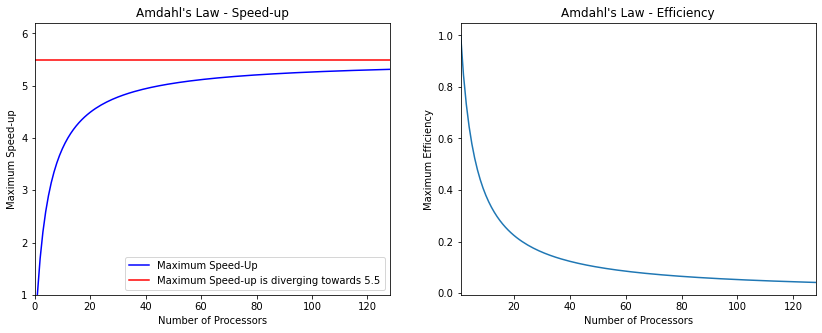

In [3]:
%run ~/performance/.graphs/amdahl.ipynb

**Challenge:** Play around with different values for f and max_p to see how the graphic changes.
    
You will notice that no matter what the fraction f for the non-parallelizable part is, we can never reach a maximum speed-up higher than the red boundary. 

If the number of processors is infinite, then we get the following limit [n]: <br>
>$\lim_{p \to \infty} \frac{1}{f+\frac{(1-f)}{p}} = \frac{1}{f}$ 

**Conclusion:** The conclusion we can draw from this is that no matter how powerful our machine is, the speed-up will never be more than $\frac{1}{f}$. This is considered the 'bottleneck' of parallel computing. 

**Limitations of Amdahl' Law**:  
- Amdahl's Law does not give us any information about what happens if we vary the problem size. Do you remember the graphic we calculated in the section about overhead? There we saw that the problem size has an influence on speed-up. The larger the list of random numbers to be sorted by quicksort, the more speed-up could we observe (while keeping the thread number constant). Amdahl's law fails to look into the effects of varying problem sizes. 
- Amdahl's Law assumes that all parallel regions use the same amount of threads. In practice this is not always the case. Each parallel region might have a different amount of threads. Another common scenario is to have a loop, and a different amount of threads for each run of the loop. The upper-bound for speed-up calculated with Amdahl's Law is still correct in these cases, because we only give an 'upper-bound'. However, we could give a more precise upper-bound by adjusting the formula of Amdahl's Law so that it considers different amount of threads for different parallel regions. 
- Amdahl's Law only gives an upper bound for speed-up. It does not give an approximation for the true speed-up. The speed-up we end up measuring can vary greatly from the one that is in theory possible (if there is no parallel overhead and if all parallel regions use the same amount of threads). 
- Amdahl's Law assumes that f is fixed. In practice however, we can observe that the ration of the parallelizable part of the program to the non-parallelizable one changes, as we change the problem size. If we want to calculate the upper-bound of speed-up for various problem sizes, Amdahl's Law is not suitable (unless we change f for each calculation).

In case you find it difficult to understand this list about limitations of Amdahl's Law, don't worry. Keep reading and come back to it again later. It will make more sense once you learned about scalability and Gustafson's law. 

## What is the serial fraction of a program ?  <a class="anchor" id="serialfraction"></a>

Have you wondered how you would be able to find out what fraction of the program is inherently serial? If you want to use Amdahl's Law and Gustafson's Law for calculations you need to know `f` (the serial fraction of the program). 

One way to get f is by measuring the wall time of all the program parts which you believe to be non-parallelizable, and the wall time of the parts which you believe can be parallelized. Doing this will give you a rough idea about the value of f. The challenge with this approach is to get all the serial parts together that are hiding within the parallel region. Let's say you have a code block which is executed by only one thread, then you have to add that to the serial execution time, even if the code lies within a region that can be parallelized. It can be challenging and time consuming to find all the code blocks which belong to the non-parallelizable part of the program.

Another way of calculating f is by using Amdahl's Law. 
We know from Amdahl's Law that if we keep the problem size fixed, and we measure the execution time with an increasing number of threads, then the maximum speed-up will diverge towards $\frac{1}{f}$. Do you already see where this goes?

Let's say you measured the execution time of your 'mandelbrot set' program with different numbers of threads. Then you calculate the speed-up for each thread number and plot the result: 

<img src='figures/Mandelbrot_fullProgram.PNG' width='400' art='Mandelbrot...."'> 

**Question:** What could be an approximate value for f in the mandelbrot set program?

In [ ]:
%run ~/performance/.topsecret/test18.ipynb

We can visually analyze what an approximate value for the maximum possible speed-up could be for an infinite number of processing units. This gives us a value for $\frac{1}{f}$. Calculating f is then really easy, as $\frac{1/f}{1} = f$. So all we have to do is find out the limit that the graph is diverging to, and divide that value by 1. Instead of doing the analysis visually we can also use some fancy python modules that allow us to fit a graph to a set of data points and then we can calculate the limit of that graph for an infinite number of p. 

**Challenge:** You can try this method with any of the programs in the `./programs` folder. Just open the notebook ['compare_timemeasuring_methods'](./extras/compare_timemeasuring_methods.ipynb)  in the folder `./extras` and calculate the speed-up progression for the program you are interested in. Try to figure out what f could be.

You might notice two interesting things:
1. If we measure the execution time on the algorithm only instead of the full program run, it is much harder for us to guess what the maximum possible speed-up for an infinite number of threads could be. 
2. The speed-up progression is most of the time not monotonously increasing. Instead it often drops again with a higher number of threads. 

The speed-up progression for the Mandelbrot-set program in the picture above is based on measurements made on the full program run. How does the graphic look if we measure execution time on the algorithm only? Here is the graphic:

<img src='figures/Mandelbrot_algorithmOnly.PNG' width='400' art='Mandelbrot...."'> 

It looks like we get a linear speed-up progression, but Amdahl's Law has taught us that this is not possible if the problem size is fixed. The reason why we don't see a logarithmic curve is that we don't have enough threads available. If we had a more powerful machine that allowed to use more than 64 threads, we would eventually notice a logarithmic curve pattern (if the number of threads is high enough). Because the fraction of the inherently serial part of the program is much smaller if we measure the execution time on the algorithm only, we can achieve much higher speed-up. Further, it takes a higher amount of threads until we can see the curve flattening. You can test this out yourself if you go to the section of Amdahl's Law. There you see some [code](#codeamdahl) with which you can create the graph of Amdahl's Law with different values for f. 

The second observation is that when we actually measure the execution time of our program with different thread numbers and plot the results, we might get very different results than what Amdahl's Law would make us believe we should get. The reason for this is parallel overhead. Amdahl's Law does not account for any parallel overhead, which is why we only get an 'upper bound' for speed-up. The actual speed-up however, can vary greatly from the upper bound of speed-up calculated with Amdahl's Law. If the parallel overhead is a constant value for any thread number, then we get a curve that resembles the curve we can calculate with Amdahl's Law. Anyhow, most of the time the parallel overhead is not a constant value, but grows as the number of threads grows. 

We can see this for example if we calculate the speed-up and efficiency progression for the 'bubblesort' program:

<img src='figures/bubblesort_performance.png' width='800' art='Bubblesort...."'> 

If we use more than 32 threads in the bubblesort program our speed-up decreases! This is because the parallel overhead increases as we use more threads. We have to be careful not to confuse the true speed-up with the speed-up that would in theory be possible if there was no parallel overhead. 

Yet another possible method to calculate f is with one or multiple speed-up measurements. With Amdahl's Law we can calculate an upper bound for speed-up: $\frac{1}{f+\frac{(1-f)}{p}}$. If we isolate f, we get $f = \frac{p - s}{s \cdot (p-1)}$ with s=upper bound for speed-up.

Does this mean we can just do any measurement for speed-up, plug it into the formula just mentioned and get f? 
This will not work because of two reasons:
1. Random Noise: If we calculate f with the formula above with different measurements, we will always get a different value for f. 
2. Difference between upper-bound and true speed-up: By now you should know that Amdahl's Law gives us only an upper bound for speed-up, not the actual speed-up. The method just mentioned would work fine if you knew the upper bound for speed-up. But you don't. You only know the true speed-up. Therefore, the f you calculate with this method is not the true f. The upper bound for speed-up for a certain thread number is higher than the actual speed-up you measured. Therefore, the true f is smaller than the f you end up calculating, when you plug the 'measured speed-up' into the formula above. 

**Conclusion:** There is not one satisfying method to calculate f. Depending on the program one or the other method will be most suitable. Another thing to consider is that no matter what method you choose to calculate f, the result will only be an approximation to the true value of f [[12]](#o).

## Scalability <a class="anchor" id="scalability"></a>

In the context of computer science the term "scalability" or "scaling" is generally used to indicate the "ability of hardware and software to deliver greater computational power when the amount of resources is increased" [[12]](#o). When we increase the number of threads in our program and as a result we observe an increase in speed-up, then we can say that our program scales. Now, we maybe want to give a more detailed report by explaining 'how' our program scales. That's where it can get a little tricky, as you will see...

In the context of parallel programming and performance you will often hear the terms "weakly scalable" and "strongly scalable". This can be quite confusing, because scientist also talk about programs that are "poorly scalable" and "highly scalable" [[2]](#j), which sounds like it should be the same, but isn't. 

Strong and weak scalability refer to two different types of scaling:

**Strong Scalability - Strong Scaling:**
If we increase the number of processors, but keep the problem size fixed, then we analyze strong scalability. For example you could measure speed-up of a 'matrix-matrix multiplication' with different numbers of threads, while keeping the matrix size constant at a certain size (i.e. 64). We ask the question: "How does $\frac{speed-up}{efficiency}$ change, if I increase the number of threads while keeping the problem size constant?"

**Weak Scalability - Weak Scaling:** 
If we increase the problem size at a consistent rate, and at the same time we increase the number of threads at a consistent rate, then we analyze weak scalability. For example you could first measure the speed-up of a 'matrix-matrix multiplication' with 8 threads and matrix size 8, then with 16 threads and matrix size 16, then with 32 threads and matrix size 32, ... We ask the question: How does $\frac{speed-up}{efficiency change}$, if I increase the number of threads, and correspondingly increase the problem size?

Do you remember what we mean with problem size? I give you a few examples. If you have a sorting algorithm, the problem size is the length of the list to be sorted. If you want to calculate the Mandelbrot set, the problem size is the height, width or number of pixels of the picture you want to create. In the programs you can find in the `./programs` section, I have adjusted all the code so that the last argument that is passed to the program is the problem size. This allows us to play around with different problem sizes and investigate how that influences speed-up. 

**Question:** Do we analyze weak or strong scalability with Amdahl's law?

In [ ]:
%run ~/performance/.topsecret/test16.ipynb

What about "poorly scalable" and "highly scalable"? Intuitively it would make sense, if poorly scalable is a synonym of weakly scalable, and highly scalable a synonym for strongly scalable. Be careful, because it is not. Instead, the terms "poorly scalable" and "highly scalable" are used with respect to different degrees of scalability.

No matter whether you analyze weak or strong scalability like we have just defined it, a program can scale or not scale. If you calculate the speed-up with an increasing number of threads (keeping the problem size the same) and you don't observe an increase in speed-up, then you can conclude that the program does not scale. On the other hand, you could observe a small increase in speed-up which you might describe as poor scaling. In the best case scenario you observe an almost linear speed-up, which means that you got almost no parallel overhead. Then you can say that the program is highly scalable. 

The same kind of scaling description you can give when you do weak scaling (increasing problem size and thread number simultaneously). Regardless of whether you analyze strong scaling or weak scaling; in both cases you can end up with a program that does not scale at all, scales poorly, highly or something in between.  

I hope everything makes sense to you until now. Now we get to the part that is confusing. Try not to get confused.

**When do we call a program strongly scalable or weakly scalable?** 

<blockquote>"If when we increase the number of processes/threads, we can keep the efficiency fixed without increasing the
problem size, the program is said to be strongly scalable. If we can keep the efficiency
fixed by increasing the problem size at the same rate as we increase the number of
$\frac{processes}{threads}$, then the program is said to be weakly scalable [1]." </blockquote>

**Let's say you analyze a program for "strong scalability"**. According to the above definition you can only say that your program "scales strongly", if the efficiency remains the same despite increasing the thread number. Even though you analyze a program for strong scalability, most likely you will come to the conclusion that the program does not "scale strongly". That is because you always have a part of the program which is inherently serial. Amdahl's Law has shown us that speed-up cannot be linear but diverges towards $\frac{1}{f}$ instead. Therefore the efficiency will never remain fixed (compare with the [graphic](#codeamdahl) we calculated in the previous section about efficiency). What this indicates is that a program can never achieve "strong scalability". 
Anyhow, this does not mean that the program does not "scale". Remember the general definition I gave you about "scalability"? In the context of computer science the term "scalability or scaling" is generally used to indicate the "ability of hardware and software to deliver greater computational power when the amount of resources is increased" [[12]](#o). As long as we see an increase in speed-up when increasing thread number, our program still scales. But be careful, you can't say that it "scales weakly", because that would imply that you analyzed the program for "weak scalability". 

**Now let's look at a different scenario where you analyze your program for "weak scalability"**. I will show you how to do this at the end of this section. With weak scalability it is definitely possible to come to the conclusion that the program "scales weakly". Anyhow, when we say that a program "scales weakly", it does by no means indicates poor scalability. According to [[2]](#j) a program that achieves "weak scalability" scales "poorly", if we have to increase the problem size exponentially in order to maintain the efficiency fixed. On the other hand, if we have a program where we only need to increase the problem size with a linear function in order to maintain the efficiency fixed, then we have a program with "weak scalability" that scales "highly". Thus the degree of scalability depends on how much we have to increase the problem size, in order to maintain the efficiency constant.

Wow. This was a lot of theory all at once. It is time that we try out what we just learned and do some experiments. In the folder `./extras` you find a notebook called ['weak_scaling'](./extras/weak_scaling.ipynb#weakscaling). In that notebook you can play around with different problem sizes and analyze weak scaling. It is with that notebook that I analyzed weak scalability for the program `matrix matrix multiplication`. I measured the execution time of that program with different matrix sizes and thread numbers. This is the result I got:

<img src='figures/matrixmatrixmultiplication_weakscaling.PNG' width='800' art='weak scaling...."'> 

For the thread numbers 2,4,8 and 16 the efficiency is almost 1. So if we wouldn't have the measurements with thread number 32 and 64 we could say that our program is weakly scalable. As you can see in the legend of the graph, I increased the problem size with the linear function $problemsize = threads \cdot 10$. 

Do you wonder if we could could change that function in a way so that we get efficiency close to 1 even for the thread numbers 32 and 64? Instead of randomly trying out different ways of adjusting that function so that we get an efficiency close to 1 for each thread, we can save ourselves some time. 

It can help to analyze how the efficiency changes with different problem sizes for a fixed number of threads. With a 32 threads we don't get an efficiency close to 1 with the problem size 320. Why not analyze how efficiency changes with different problem sizes for a fixed number of threads.You can do this in the notebook ['./extras/problemsize'](./extras/problemsize.ipynb#problemsize). This is the result I got for 32 threads:

<img src='figures/matrixmatrixmul_problemsize.PNG' width='800' art='weak scaling...."'> 

This does not look good. I hoped to be able to increase the speed-up at 32 threads by increasing problem size. If we manage to reach a speed-up close to the number of threads used (32 in this example), then we would end up with an efficiency close to 1. For our matrix matrix multiplication program it looks like there is nothing we can do to get to an efficiency of 1 with 32 threads. Thus our matrix matrix program is not weakly scalable (unless we don't increase the thread number higher than 16).

<img src='figures/crying.jpg' width='200' art="my program doesn't scale..."> 

A question might have come up in your mind. Why would anyone think that the speed-up and efficiency increase, when we increase the problem size? Obviously our programs, regardless whether they use parallelism or not, slow down if we increase the problem size. Now there is a theory that the serial version of a program slows down much more than the parallelized one when we increase the problem size. The result is that we get better speed-up when we increase the problem size. As we have just seen in the example of the matrix matrix multiplication with 32 threads, this theory is not always right. The reason for this is once again parallel overhead. 

In the next section about Gustafson's Law we will have a more detailed look at the relationship of problem size and speed-up.

## Gustafson's Law <a class="anchor" id="gustafson"></a>

Amdahl's law does not consider any change in problem size, but keeps it fixed instead. What we can observe in real life however, is a general trend for the problem size of applications to adjusts to the hardware capacities. An obvious example for this is the gaming industry. The computer games that are developed nowadays leverage hardware to its maximum, and would often run poorly on hardware that was developed 5 years ago, and not work at all on hardware that was developed 10 years ago. This can be observed not only with computer games, but with a wide range of applications [[4]](#n). As the hardware becomes more powerful, the programs we develop to run on that hardware is designed to handle bigger problem sizes. 

It is this observation that has let Gustafson to the following suggestion:

<blockquote>". . . speedup should be measured by scaling the problem to the number of processors, not by fixing the problem size" <sub>Gustafson 1988, cited in [4]</sub> </blockquote> 
    
Gustafson's Law gives us a formula for calculating  an upper bound for 'scaled speed-up'. That is the speed-up we achieve if we increase the problem size at the same rate as we increase the number of processors.
The derivation of the formula for scaled speed-up might take same time to understand. If your eyes don't start shining when you hear the word 'mathematics', then just skip all the calculations and go straight to the final formula which is Gustafson's Law. The final formula for scaled speed-up is in fact super simple. Understanding how to get to that formula is the more challenging part. 
    
In the section about Amdahl's law, we learned that a program can be divided into two parts: 
1. f = the part that is inherently serial
2. 1-f = the part that is parallelizable
    
The fraction of the first part we call f, and the fraction of the second part we call 1-f. 

**Question:** What happens to the value of f if we increase the problem size? Does it stay the same? Does it get smaller? Does it get bigger?

In [ ]:
%run ~/performance/.topsecret/test17.ipynb

When we increase the problem size we can usually observe that the execution time of the parallelizable part of the program increases much more than the execution time of the inherently serial part of the program. Because of this, the value for f changes if we change the problem size! As the problem size increases, f decreases. How much exactly will depend on the program. 

We define:
- $\alpha$ = "scaling function of the part of the program that does not benefit from parallelization with respect to the complexity of the problem size" [[11]](#m)
- $\beta$ = "scaling function of the part of the program that benefits from parallelization with respect to the complexity of the problem size" [[11]](#m)

The scaling functions $\alpha$ and $\beta$ take as input the problem size, and return the factor by which the inherently serial part and parallelizable part decrease/increase.

With the use of $\alpha$ and $\beta$ we can give a more generalized calculation of the serial execution time, which accounts for different problem sizes[[11]](#m):
<blockquote> $T_{\alpha \beta}(1) = \alpha \cdot t_{ser} + \beta \cdot t_{par} = \alpha \cdot f \cdot T(1) + \beta \cdot (1-f) \cdot T(1)$ </blockquote>

This is how you can calculate the execution time of a program that does not apply parallelism (number of processors is set to 1), but has various problem sizes. The problem size will be the input of the scaling functions $\alpha$ and $\beta$. The output of these functions will determine the factor by which the execution time of the two program parts have to increase, in order to account for the increased problem size. 

**Question:** How would you adjust this formula, in order to calculate the execution time of a parallelized program using p processors?

Just like we did in the section about Amdahl's Law, we can divide the execution time of the parallelizable part by p, which gives us a lower bound for the execution time of that part of the program. The lower bound is there because we don't account for parallel overhead. This is why we now have a 'bigger-equal' sign instead of the 'equal' sign we used in the formula above. We get the following formula for calculating the execution time of a parallel program, in dependence of problem size and the number of processors used:

<blockquote> $T_{\alpha \beta}(p) >= \alpha \cdot t_{ser} + \frac{\beta \cdot t_{par}}{p} = \alpha \cdot f \cdot T(1) + \frac{\beta \cdot (1-f) \cdot T(1)}{p}$ </blockquote>

**Question:** How would you calculate speed-up with that formula ?

Dividing $T_{\alpha \beta}(1)$ by $T_{\alpha \beta}(p)$ gives us a scaled upper bound for speed-up [[11]](#m):

<blockquote> Speed-up$_{\alpha \beta}(p) = \frac{T_{\alpha \beta}(1)}{T_{\alpha \beta}(p)} <= \frac{\alpha \cdot t_{ser} + \beta \cdot t_{par}}{\alpha \cdot t_{ser} + \frac{\beta \cdot t_{par}}{p}} = \frac{ \alpha \cdot f \cdot T(1) + \beta \cdot (1-f) \cdot T(1)}{\alpha \cdot f \cdot T(1) + \frac{\beta \cdot (1-f) \cdot T(1)}{p}} = 
\frac{\alpha \cdot f + \beta \cdot (1-f)}{\alpha \cdot f+\frac{\beta \cdot (1-f)}{p}}$</blockquote>

We can simplify this formula a little bit. Instead of using two separate scaling functions $\alpha$ and $\beta$ we can can just look at the ration of the two. This makes sense, because at the end we are only interested in the ratio. We want to know how much faster the parallelizable part of the program grows compared to the part that is inherently serial. Thus, we define [[11]](#m):

<blockquote>$\gamma = \frac{\alpha}{\beta}$ </blockquote>

and the according function for the scaled upper bound of speed-up is:

<blockquote> Speed-up$_{\gamma}(p) <= \frac{f + \gamma \cdot (1-f)}{f+\frac{\gamma \cdot (1-f)}{p}}$</blockquote>

Wow, that was a lot of work! But what about Gustafson't Law? Isn't that what we are talking about? Be patient, we are almost there...

The value for $\gamma$ can either be [[11]](#m):
- $\gamma = 1$ (i.e. $\alpha=\beta$) → Amdahl's Law
- $\gamma = p$ (i.e. $\alpha=1$ and $\beta=p$) → Gustafson's Law
- $\gamma = $ any other function depending on p

In the first case of $\gamma = 1$ we end up with Amdahl's Law. Just test it. Replace $\gamma$ with 1 in the formula above and you end up with the formula for 'upper-bound speed-up' like we defined it in the section about Amdahl's Law. Thus, if you analyze your program for 'weak scalability' and you notice that $\alpha=\beta$, then that means that you have the exact same restrictions on speed-up that apply to Amdahl's Law.

The second case where $\gamma = p$ is where Gustafson's Law can be used. If  $\gamma = p$ then we can simplify the formula for upper-bound scaled speed-up even more. We replace $\gamma$ with p, and end up with Gustafson's Law [[11]](#m):

**Gustafson's Law:** <blockquote> Scaled speed-up(p) $ <= \frac{f + p \cdot (1-f)}{f+\frac{p \cdot (1-f)}{p}} = f + p \cdot (1-f) $</blockquote>

and the efficiency in the case of Gustafson's Law:

<blockquote> Efficiency(p) $ <= \frac{f + p \cdot (1-f)}{p} = \frac{f}{p} + (1-f) $</blockquote>

Gustafson's Law only holds true, if $\gamma = p$. What if that is not the case? Well, no one is going to stop us from using Gustafson's law nevertheless, but the calculated result will not reflect reality. 

So, the challenge is to find a function $\gamma$ which returns p. Many people think that if they increase the problem size at the same rate as they increase p, then Gustafson's law can be used. Be careful, this is not necessarily the case. Instead, you need to increase the problem size in a manner so that the execution time of the parallelizable part increases at rate p (assuming that the the serial part remains unaffected by an increase of the problem size). If you know at what rate to increase the problem size so that $\gamma = p$, then you can apply Gustafson's Law to calculate a scaled upper bound for speed-up. 

Just like we did with Amdahl's Law, we can calculate the progression of maximum scaled speed-up and efficiency using Gustafson's Law:

In [ ]:
# parameters for you to adjust
f_1 = 0.2
f_2 = 0.1
f_3 = 0.05
max_p = 64

In [ ]:
%run ~/performance/.graphs/gustafson.ipynb

**Challenge:** Adjust the values for f in the code above to see how this changes the graphic.

Keep in mind, that with Gustafson's Law we assume that the problem size is increased simultaneously to the number of processors. That is the reason why we can achieve a linear speed-up progression with Gustafon's Law. Another thing to remember is that just as it was the case with Amdahl's law, we only see an upper bound for scaled speed-up. The true speed-up can be much lower, as there will be parallel overhead.

**Question:** What is the maximum scaled speed-up can you can achieve, if you have an infinite amount of processors ? 

In [ ]:
%run ~/performance/.topsecret/test19.ipynb

The results we get with Gustafson's Law are much more promising than the pessimistic prediction we get with Amdahl's Law.
Basically Gustafson is saying that we can achieve ever increasing speed-up, as long as we can increase the problem size and amount of parallel processing units. 

**Limitations of Gustafson's Law:**
- Gustafson's law only gives an upper-bound for scaled speed-up. It will not give us an estimate with respect to the true performance of our program. 
- Gustafson's law does not account for parallel overhead.
- Gustafson's law only holds true if $\gamma = p$.
- Gustafson's law can only be applied to applications where the problem size can be increased. Further, the end user of the parallel program should have an interest in an increased problem size. 

## Summary <a class="anchor" id="summary"></a>
    
We have learned how to calculate two important measures for performance in parallel programming: speed-up and efficiency. In order to calculate speed-up and efficiency it is necessary to measure the execution time of the serial and parallel program. A task that seems simple, but can bring up a lot of questions too. We looked into different methods of measuring execution time, and how these can influence the speed-up and efficiency we end up calculating. 

In the section about Amdahl's Law we saw that speed-up is limited by an upper-bound. No matter how small the inherently serial part 'f' of the program is, and no matter how many parallel processing units we have, we will never be able to achieve a speed-up beyond a certain limit. That limit is 1/f. We can only use Amdahl's law to calculate an upper bound for speed-up if we know the fraction of the program that is inherently serial.We can get an approximate value for 'f' by measuring the wall time of different program parts, or by analyzing the speed-up progression of a program with the knowledge we gained from Amdahl's Law.

When we apply Amdahl's Law we keep the problem size fixed, and calculate the upper bound of speed-up for different amounts of parallel processing units (threads). We also call this 'strong scaling'. Another common approach is called 'weak scaling', which implies that we increase the problem size in correspondence to the increase of the amount of parallel processing units. In weak scaling we can often achieve higher speed-up, even with a large number of threads. The explanation for this is that the parallelizable part of a program grows faster than the part that is inherently serial. 

A formula for calculating the upper bound of speed-up in 'weak scaling' analyses is given with Gustafson's law. If we have an infinite number of processors and if we can make our problem size infinitely large, then we can achieve an infinite speed-up according to Gustafson's Law. Yet, just as it was the case with Amdahl's law, Gustafson's Law only allowes us to calculate an 'upper-bound' for speed-up. The true speed-up can be much lower, because neither Amdahl's Law nor Gustafson's law do account for parallel overhead. 
    
<img src='figures/theEnd.jpg' width='500' art='You are now a master of performance...."'> 

Wow!!! You have just read through that entire notebook. Or you skipped ahead because you wanted to look at all the pictures. Anyways, congratulations! 

You might want to reread one or the other passages. Many things will make much more sense in the second read. Another thing I would suggest to you is looking at the notebooks in the `./extra` folder. These allow you to play around with different programs, and investigate how the change in threads and/or problem size influence execution time, speed-up and efficiency. You can also use these notebooks to analyze your own parallelized programs. More about this you can find in the `./readme.txt` file. 

And the most important thing last: **Remember to fill out my questionnaire!!!**

Please submit the form before the **15th of June 2021**. You can find the questionnaire through this link: https://docs.google.com/forms/d/e/1FAIpQLSeOpNqV1UwPJXYqmG5rfWACDBQtFQvoR_Xm87btLuLylaMMsg/viewform.

## References <a class="anchor" id="references"></a>

[1] Pacheco, Peter S. (2013): An introduction to parallel programming. Amsterdam: Elsevier Science & Technology.<a class="anchor" id="a"></a>

[2] Trobec, Roman; Slivnik, Bos̆tjan; Bulić, Patricio; Robic̆, Borut (2018): Introduction to parallel computing. From algorithms to programming on state-of-the-art platforms. Cham: Springer. <a class="anchor" id="b"></a> <a class="anchor" id="j"></a>

[3] Timothy Mattson (2013): "Introduction to OpenMP: 02 part 1 Module 1". Youtube Video. Accessed on 18.10.2020 at  https://youtu.be/cMWGeJyrc9w. <a class="anchor" id="c"></a>

[4] McCool, Michael; Reinders, James; Robison, Arch D. (2012): Structured parallel programming. Patterns for efficient computation. Amsterdam: Elsevier. <a class="anchor" id="n"></a>

[5] Beazley, David M.; Jones, Brian K. (2013): Python cookbook. 3rd ed. Beijing: O'Reilly. <a class="anchor" id="e"></a>

[6] The Python Standard Library - Timeit Module. Documentation. Accessed on 09.10.2020 at https://docs.python.org/3/library/timeit.html. <a class="anchor" id="g"></a>

[7] Bailey, David H. (1992): Misleading Performance Reporting in the Supercomputing Field. In Scientific Programming 1 (2), pp. 141–151. DOI: 10.1155/1992/328793. <a class="anchor" id="f"></a>

[8] Built-in magic commands. Documentation. Accessed on 09.10.2020 at https://ipython.readthedocs.io/en/stable/interactive/magics.html. <a class="anchor" id="h"></a>

[9] Bengel, Günther; Baun, Christian; Kunze, Marcel; Stucky, Karl-Uwe (2015): Masterkurs Parallele und Verteilte Systeme. Grundlagen und Programmierung von Multicore-Prozessoren, Multiprozessoren, Cluster, Grid und Cloud. Wiesbaden: Springer Fachmedien.   <a class="anchor" id="i"></a>

[10] Mattson, Timothy G.; Sanders, Beverly A.; Massingill, Berna (2005): Patterns for parallel programming. Boston, London: Pearson Education. <a class="anchor" id="k"></a>

[11] Schmidt, Bertil; González-Domínguez, Jorge; Hundt, Christian; Schlarb, Moritz (2018): Parallel computing. Concepts and pratice. Cambridge, MA: MK Morgan Kaufmann Publishers.  <a class="anchor" id="m"></a>

[12] Li, Xin (2018): Scalability: strong and weak scaling. Unpublished article. Accessed on 12.01.2021 at https://www.kth.se/blogs/pdc/2018/11/scalability-strong-and-weak-scaling. <a class="anchor" id="o"></a>

[13] Picture of Gene Amdahl. Access on 2.2.2021 at https://cioperu.pe/fotoreportaje/15674/la-generalmente-interesante-historia-del-mainframe-de-ibm/?foto=5. <a class="anchor" id="l"></a>

[14] Movie Depicable Me (2010): "Minions - WHAT ?!" Youtube Video. Accessed on 25.11.2020 at  https://www.youtube.com/watch?v=MfylJy_nMbM. <a class="anchor" id="d"></a>